In [60]:
from collections import Counter
import pandas as pd
import networkx as nx
import re
import pickle
import numpy as np
from ast import literal_eval

In [2]:
data_file = '/nas/eclairnas01/users/siyiguo/incas_data/hashtag_coord_phase1a.edgelist'
G = nx.read_edgelist(data_file)
accounts = list(G.nodes())

In [3]:
df = pd.read_csv('/nas/eclairnas01/users/siyiguo/incas_data/phase1a.csv',lineterminator='\n',nrows=10000)
df.columns

Index(['id', 'name', 'contentText', 'mediaType', 'language', 'imageUrls',
       'timePublished', 'retweetCount', 'twitterAuthorScreenname', 'tweetId',
       'twitterUserId', 'followingCount', 'followerCount', 'engagementType',
       'engagementParentId', 'mentionedUsers', 'providerName', 'tweetId.1',
       'tweetName', 'time_dt', 'date', 'tweet_duplicates',
       'retweet_duplicates', 'reply_duplicates', 'user', 'num_pro_macron',
       'num_pro_MLP', 'tweet_number_tweets', 'tweet_number_high_at_tweets',
       'tweet_number_unique_tweets', 'reply_number_tweets',
       'reply_number_high_at_tweets', 'reply_number_unique_tweets',
       'retweet_number_tweets', 'retweet_number_high_at_tweets',
       'retweet_number_unique_tweets', 'number_unique_tweets',
       'tweet_FractRepeated', 'reply_FractRepeated', 'retweet_FractRepeated',
       'Fract_MLP', 'MLPMacronOdds',
       'agenda-1.4_Believe that ENTITY or GROUP is moral/ethical/honest/beneficial',
       'agenda-1.3_Believe th

In [11]:
df['contentText'] = df['contentText'].str.replace(',','')
df['contentText'] = df['contentText'].str.replace('.','')
df['contentText'] = df['contentText'].str.replace(';','')

In [27]:
pattern = r'#\S+'
hashtags = [x for text in df.loc[:100,'contentText'].values for x in re.findall(pattern, text)]

[(i, count, round(count/len(hashtags)*100.0, 2)) for i, count in Counter(hashtags).most_common(5)]

[('#Lons', 6, 11.11),
 ('#Macron', 4, 7.41),
 ('#Polonium', 2, 3.7),
 ('#LaRépubliqueEnMarche', 2, 3.7),
 ('#Manifestation', 2, 3.7)]

In [ ]:
pattern = r'#\S+'

cluster_hashtags = []

df_user = df.groupby('twitterAuthorScreenname')
user_lst = set(pd.unique(df['twitterAuthorScreenname']))
for c in nx.connected_components(G):
    # df_cluster = []
    # for u in c:
    #     if u in user_lst:
    #         df_cluster.append(df_user.get_group(u))
    # df_cluster = pd.concat(df_cluster,axis=0)
    df_cluster =pd.concat([df_user.get_group(u) for u in c])
    hashtags = [x for text in df_cluster['contentText'].values for x in re.findall(pattern, text)]
    hashtags = [(i, count, round(count/len(hashtags)*100.0, 2)) for i, count in Counter(hashtags).most_common(5)]
    cluster_hashtags.append(hashtags)

In [3]:
embeddings = pickle.load(open('../test_phase1a/test_data_embeddings.pkl','rb'))
labels = pickle.load(open('../test_phase1a/test_data_labels.pkl','rb'))

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

def plot_tsne(feats, labels, fig_save_path: str):
    """
    Plot feature embeddings as tsne.

    Can be used to see if source and target domain have distinct features.
    """
    tsne = TSNE(n_components=2, verbose=0) #, perplexity=40, n_iter=300
    tsne_results = tsne.fit_transform(feats)

    plt.figure(figsize=(8, 8))
    plt.xlim((-40, 40))
    plt.ylim((-40, 40))
    fig = sns.scatterplot(x=tsne_results[:, 0],
                          y=tsne_results[:, 1],
                          hue=labels,
                          palette=sns.color_palette(
                              "hls", len(np.unique(labels))),
                          legend="full",
                          alpha=0.3).get_figure()

    # fig.savefig(fig_save_path + 'tsne.png', format='png')

In [15]:
tsne = TSNE(n_components=2, verbose=0) #, perplexity=40, n_iter=300
tsne_results = tsne.fit_transform(embeddings)

In [ ]:
for c in [60, 33, 43, 49, 22, 54, 56,  6,  0, 95]:
    plt.figure(figsize=(8, 8))
    # plt.xlim((-40, 40))
    # plt.ylim((-40, 40))
    fig = sns.scatterplot(x=tsne_results[labels==c][:, 0],
                            y=tsne_results[labels==c][:, 1],
                            hue=labels[labels==c],
                            palette=sns.color_palette(
                                "hls", 1),
                            legend="full",
                            alpha=0.3).get_figure()

### biggest cluster

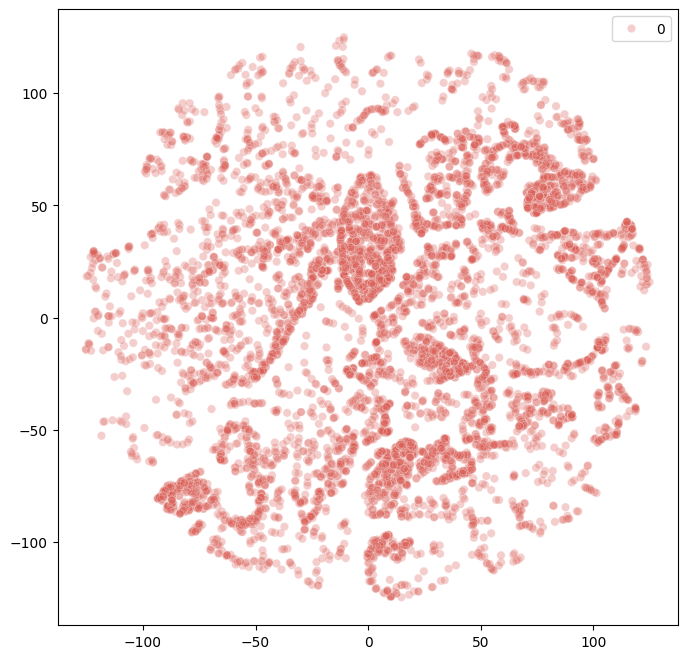

In [53]:

target_set = [0]
plt.figure(figsize=(8, 8))
# plt.xlim((-40, 40))
# plt.ylim((-40, 40))
fig = sns.scatterplot(x=tsne_results[np.isin(labels,target_set)][:, 0],
                        y=tsne_results[np.isin(labels,target_set)][:, 1],
                        hue=labels[np.isin(labels,target_set)],
                        palette=sns.color_palette(
                            "hls", len(target_set)),
                        legend="full",
                        alpha=0.3).get_figure()

### top 7 clusters other than the biggest cluster

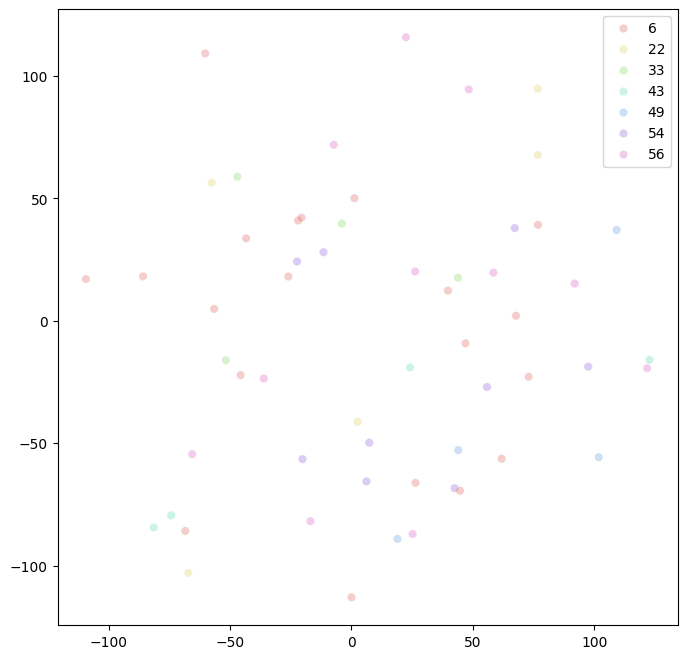

In [47]:

target_set = [33, 43, 49, 22, 54, 56, 6]
plt.figure(figsize=(8, 8))
# plt.xlim((-40, 40))
# plt.ylim((-40, 40))
fig = sns.scatterplot(x=tsne_results[np.isin(labels,target_set)][:, 0],
                        y=tsne_results[np.isin(labels,target_set)][:, 1],
                        hue=labels[np.isin(labels,target_set)],
                        palette=sns.color_palette(
                            "hls", len(target_set)),
                        legend="full",
                        alpha=0.3).get_figure()

In [66]:
test_gt = pd.read_csv('/nas/eclairnas01/users/siyiguo/incas_data/phase1a_gt_data_df.csv')
test_gt['hashtags'] = test_gt['hashtags'].apply(lambda x: literal_eval(x) if x is not np.nan else x)
test_gt['ind_hashtag'] = test_gt['ind_hashtag'].apply(lambda x: literal_eval(x) if x is not np.nan else x)
test_gt

,label,hashtags,ind_hashtag
0,95,NaN,"[(#Presidentielle2017, 3, 8.57), (#Fillon, 3, ..."
1,0,"[(#Macron, 57474, 3.09), (#JLM2017, 40568, 2.1...","[(#LeGrandDebat, 3, 20.0), (#TPMP1000, 2, 13.3..."
2,95,NaN,"[(#LE20H, 1, 14.29), (#ensemble, 1, 14.29), (#..."
3,95,NaN,"[(#ONPC, 4, 20.0), (#HamonBercy, 3, 15.0), (#B..."
4,95,NaN,"[(#Ensemble, 3, 37.5), (#debat2017, 1, 12.5), ..."
...,...,...,...
56411,95,NaN,"[(#veldhiv, 1, 100.0)]"
56412,95,NaN,"[(#Élysée2017, 11, 20.75), (#MarineÀNice, 5, 9..."
56413,95,NaN,"[(#Out, 1, 7.14), (#merci, 1, 7.14), (#OnAvanc..."
56414,95,NaN,"[(#LeGrandDebat, 4, 8.7), (#Fillon, 3, 6.52), ..."


In [37]:
np.argsort(np.histogram(test_gt['label'],bins=96)[0])

array([47, 29, 34, 36, 39, 42, 44, 48, 50, 51, 53, 27, 55, 61, 64, 65, 75,
       78, 80, 81, 84, 90, 91, 59, 25, 46, 15, 12,  9, 16,  7, 20, 21, 17,
        3, 10, 13,  2,  5, 66, 62, 63, 58,  8, 26, 71, 68, 72, 73, 74, 79,
       85, 86, 87, 88, 67, 57, 11, 37, 23, 28, 30, 35, 38, 19, 40, 18, 93,
       45, 14, 94, 52, 92, 70,  1, 76, 31, 69,  4, 82, 83, 32, 41, 77, 24,
       89, 60, 33, 43, 49, 22, 54, 56,  6,  0, 95])

array([[<Axes: title={'center': 'label'}>]], dtype=object)

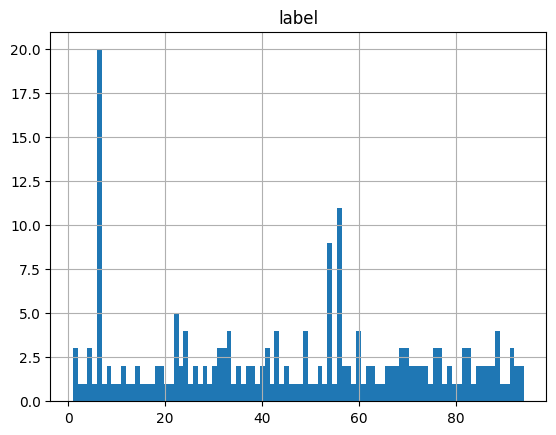

In [31]:
test_gt[(test_gt.label!=95) & (test_gt.label!=0)].hist(bins=94)

In [49]:
from collections import Counter
Counter(test_gt['label'])

Counter({95: 48677,
         0: 7529,
         6: 20,
         56: 11,
         54: 9,
         22: 5,
         43: 4,
         24: 4,
         60: 4,
         89: 4,
         33: 4,
         49: 4,
         76: 3,
         4: 3,
         92: 3,
         31: 3,
         83: 3,
         32: 3,
         1: 3,
         69: 3,
         41: 3,
         70: 3,
         77: 3,
         82: 3,
         73: 2,
         93: 2,
         68: 2,
         74: 2,
         18: 2,
         85: 2,
         52: 2,
         58: 2,
         45: 2,
         37: 2,
         63: 2,
         14: 2,
         19: 2,
         88: 2,
         86: 2,
         28: 2,
         23: 2,
         57: 2,
         79: 2,
         72: 2,
         38: 2,
         30: 2,
         26: 2,
         87: 2,
         66: 2,
         67: 2,
         71: 2,
         11: 2,
         40: 2,
         62: 2,
         35: 2,
         8: 2,
         94: 2,
         53: 1,
         61: 1,
         21: 1,
         44: 1,
         64: 1,
    

In [73]:
all_ind_hashtags = [i[0] for x in test_gt['ind_hashtag'].tolist() for i in x]
Counter(all_ind_hashtags).most_common(50)

[('#Macron', 12247),
 ('#Presidentielle2017', 7025),
 ('#BourdinDirect', 6164),
 ('#LeGrandDebat', 5474),
 ('#LEmissionPolitique', 4548),
 ('#Marine2017', 4002),
 ('#LeGrandDébat', 3656),
 ('#2017LeDébat', 3536),
 ('#EnMarche', 3519),
 ('#JLM2017', 3274),
 ('#2017LeDebat', 2792),
 ('#Fillon2017', 2748),
 ('#LaForceDuPeuple', 2588),
 ('#Fillon', 2479),
 ('#JeVoteMacron', 2392),
 ('#Hamon2017', 2366),
 ('#legislatives2017', 2062),
 ('#TF1', 1897),
 ('#FN', 1892),
 ('#RTLMatin', 1835),
 ('#Présidentielle2017', 1779),
 ('#JeVoteFillon', 1672),
 ('#AuNomDuPeuple', 1635),
 ('#ChoisirLaFrance', 1629),
 ('#FranceInsoumise', 1620),
 ('#MacronPrésident', 1582),
 ('#ONPC', 1549),
 ('#JLMToulouse', 1493),
 ('#France', 1441),
 ('#FillonPresident', 1441),
 ('#20h', 1381),
 ('#macron', 1369),
 ('#LePen', 1365),
 ('#JT20H', 1342),
 ('#Élysée2017', 1321),
 ('#Ensemble', 1312),
 ('#FillonParis', 1282),
 ('#JLMLille', 1250),
 ('#JT20h', 1145),
 ('#Frexit', 1134),
 ('#Marseille', 1059),
 ('#Macron2017', 1

In [78]:
test_gt['cluster0_label'] = 0
def tmp(ind_hashtag,target_hashtag):
    return target_hashtag in [x[0] for x in ind_hashtag]
for i,target_hashtag in enumerate(['#Marine2017','#JLM2017','#Fillon2017','#Hamon2017','#Gabon','#RPFavecFF']):
    test_gt.loc[test_gt['ind_hashtag'].apply(lambda x: tmp(x,target_hashtag)),'cluster0_label'] = i+1


In [81]:
cluster0_labels = test_gt['cluster0_label'].values

### Look at biggest cluster - different hashtag uses

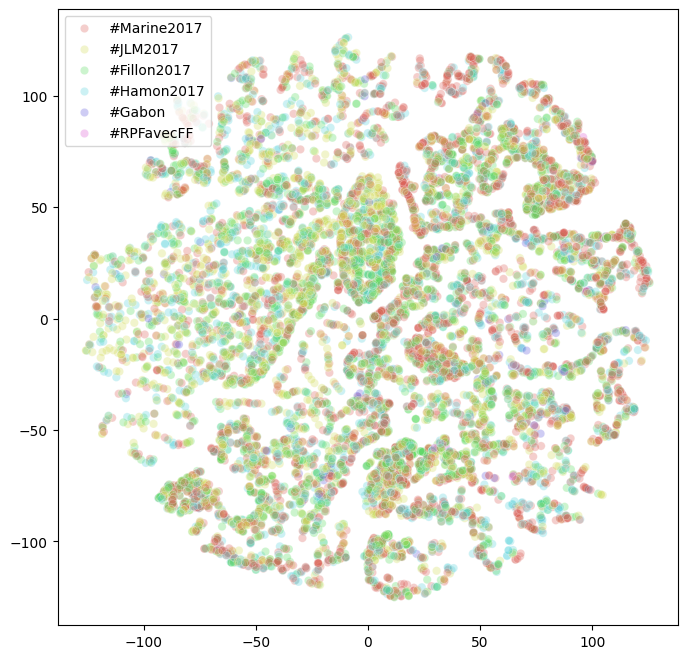

In [94]:

target_set = list(range(1,7))
plt.figure(figsize=(8, 8))
# plt.xlim((-40, 40))
# plt.ylim((-40, 40))
g = sns.scatterplot(x=tsne_results[np.isin(cluster0_labels,target_set)][:, 0],
                        y=tsne_results[np.isin(cluster0_labels,target_set)][:, 1],
                        hue=cluster0_labels[np.isin(cluster0_labels,target_set)],
                        palette=sns.color_palette(
                            "hls", len(target_set)),
                        # legend=False,
                        alpha=0.3)
handles, labels  =  g.get_legend_handles_labels()
g.legend(handles, ['#Marine2017','#JLM2017','#Fillon2017','#Hamon2017','#Gabon','#RPFavecFF'])
plt.show()

* Not working too well - based on the proxy of ground truth (hashtag usage)
* Need to get the correct ground truth from Keith - clusters of coordinated campaigns
* TRY:
    * use dimension reduced BERT embedding instead of affect features (different campaigns express similar emotions?)
    * need to modify the data augmentation method for generating positive examples for contrastive learning